In [1]:
import random
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [2]:
seed = 10
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from torchvision import transforms

transforms = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [4]:
model = torch.load('/mnt/d/Lung_progression/model.pt')
model = model.to(device = 'cpu')

In [5]:
data = ImageFolder(root = '/mnt/d/Lung_progression/data_10x/test',
                   transform = transforms)
dataloader = DataLoader(data, batch_size= 500, shuffle = True)


In [6]:
model.eval()
inputs, classes = next(iter(dataloader))
output = model.forward(inputs)

In [7]:
with torch.no_grad():
    tsne = TSNE(n_components=2, perplexity = 25, learning_rate = 1500).fit_transform(output)

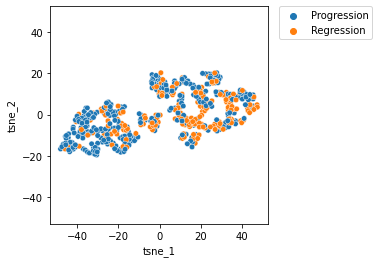

In [8]:
import pandas as pd
import seaborn as sns
tsne_result_df = pd.DataFrame({'tsne_1': tsne[:,0], 'tsne_2': tsne[:,1], 'label': classes})
tsne_result_df['label'] = tsne_result_df['label'].replace(0, 'Progression')
tsne_result_df['label'] = tsne_result_df['label'].replace(1, 'Regression')
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=30)
lim = (tsne.min()-5, tsne.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)